<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1">Data</a></span><ul class="toc-item"><li><span><a href="#Airline-dataset" data-toc-modified-id="Airline-dataset-1.1">Airline dataset</a></span></li><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-1.2">Train-test split</a></span></li><li><span><a href="#Forecasting-horizon" data-toc-modified-id="Forecasting-horizon-1.3">Forecasting horizon</a></span></li></ul></li><li><span><a href="#Forecasters" data-toc-modified-id="Forecasters-2">Forecasters</a></span><ul class="toc-item"><li><span><a href="#NaiveForecaster" data-toc-modified-id="NaiveForecaster-2.1">NaiveForecaster</a></span></li><li><span><a href="#EnsembleForecaster" data-toc-modified-id="EnsembleForecaster-2.2">EnsembleForecaster</a></span></li></ul></li></ul></div>

Evaluation of **sktime** for time series forecasting:

* [sktime](https://github.com/alan-turing-institute/sktime)
* [Sktime: a Unified Python Library for Time Series Machine Learning](https://towardsdatascience.com/sktime-a-unified-python-library-for-time-series-machine-learning-3c103c139a55)

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 7)

# Data

## Airline dataset

In [3]:
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split

# load pandas Series data
s_data = load_airline()
s_data.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Number of airline passengers, dtype: float64

## Train-test split

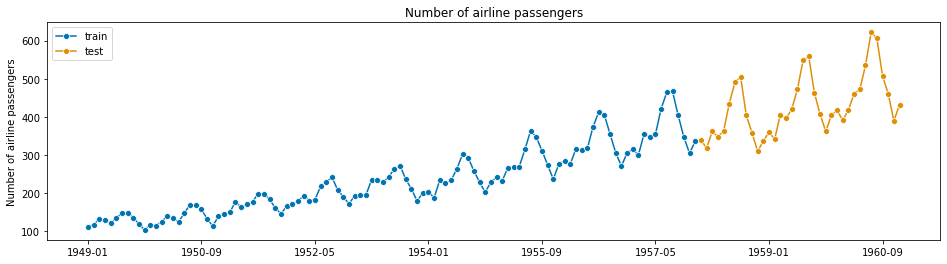

In [24]:
from sktime.utils.plotting import plot_series

y_train, y_test = temporal_train_test_split(s_data)

_, ax = plot_series(y_train, y_test, labels=["train", "test"]);
ax.set_title('Number of airline passengers');

## Forecasting horizon

In [10]:
from sktime.forecasting.base import ForecastingHorizon

horizon = ForecastingHorizon(np.arange(1, len(y_test) + 1))

# Forecasters 

## NaiveForecaster

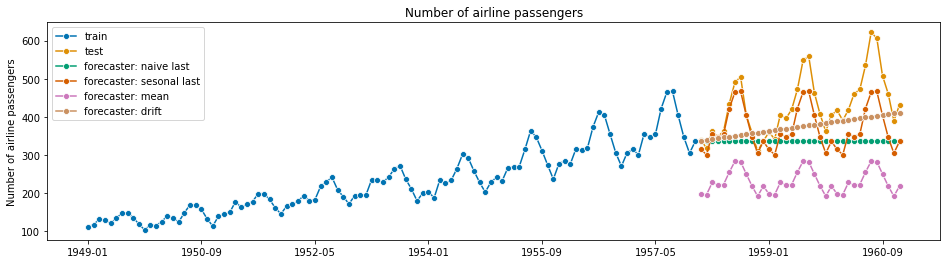

In [26]:
from sktime.forecasting.naive import NaiveForecaster

forecasters = [('naive last', NaiveForecaster(strategy='last')),
               ('sesonal last', NaiveForecaster(strategy='last', sp=12)),
               ('mean', NaiveForecaster(strategy='mean', sp=12)),
               ('drift', NaiveForecaster(strategy='drift')),
               ]

sets = {'train': y_train, 'test': y_test}

for name, forecaster in forecasters:
    forecaster.fit(y_train)
    y_pred = forecaster.predict(horizon)
    sets[f'forecaster: {name}'] = y_pred

_, ax = plot_series(*sets.values(), labels=sets.keys())
ax.set_title('Number of airline passengers')

## EnsembleForecaster

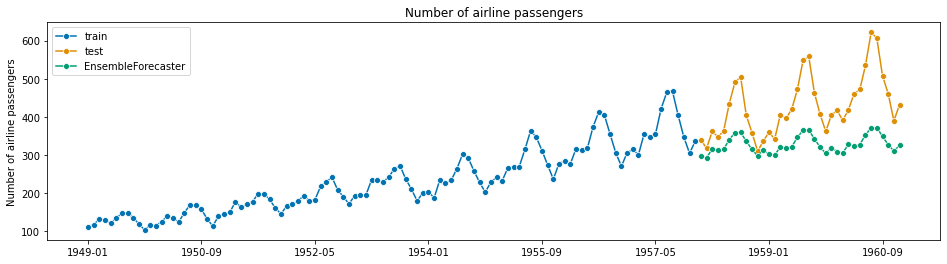

In [28]:
from sktime.forecasting.compose import EnsembleForecaster

forecaster = EnsembleForecaster(forecasters)

forecaster.fit(y_train)
y_pred = forecaster.predict(horizon)

_, ax = plot_series(y_train, y_test, y_pred, labels=[
                    "train", "test", "EnsembleForecaster"])
ax.set_title('Number of airline passengers')